In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot

import tensorflow as tf
from tensorflow import keras

In [ ]:
#load the data
from numpy import load
names=['gamma_image_moved', 'electron_image', 'proton_image', 'helium_image', 'nitrogen_image', 'iron_image', 'silicon_image']
dset=[]
for i in range (7):
    dset.append(load('file/'+names[i]+'.npy'))

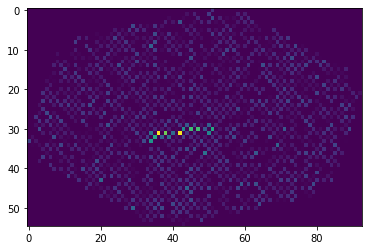

In [12]:
# Plot a image from any particle
plt.imshow(dset[3][46], interpolation='none',aspect='auto')#,cmap=plt.cm.binary
fig_size = plt.rcParams["figure.figsize"]
plt.show()

# split data

In [13]:
#create the targets
target=[]
for i in range (7):
    target.append(i*np.ones(dset[i].shape[0]))

target=np.concatenate((target[0], target[1], target[2], target[3], target[4], target[5], target[6]), axis=0)
#put the dataset together
data=np.concatenate((dset[0],dset[1],dset[2],dset[3],dset[4],dset[5],dset[6]),axis=0)

In [14]:
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.20, random_state=3)  

In [15]:
# input image dimensions
imgRows, imgCols = 55, 93
numChannels=1
samples=X_train.shape[0]
numClasses=7

x_train=X_train
x_test=X_test

# #to put  the channels at the beginning
# x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
# x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
# input_shape = (1, img_rows, img_cols)

#to put  the channels at the end
x_train = x_train.reshape(x_train.shape[0], imgRows, imgCols, numChannels)
x_test = x_test.reshape(x_test.shape[0], imgRows, imgCols, numChannels)
input_shape = (imgRows, imgCols, numChannels)

# convert class vectors to binary class matrices
y_train_c = keras.utils.to_categorical(y_train, numClasses)
y_test_c = keras.utils.to_categorical(y_test, numClasses)


In [16]:
class_names = ['gamma', 'electron', 'proton', 'helium', 'nitrogen', 'iron', 'silicon']
# plt.figure(figsize=(15,15))
# for i in range(12):
#     plt.subplot(5,4,i+1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)
#     plt.imshow(x_train[i], cmap=plt.cm.binary)
#     plt.xlabel(class_names[int(y_train[i])])
# plt.show()

# Model 1: FC NN

In [22]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(numClasses, activation=tf.nn.softmax))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
%%time
hist=model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test)) #epochs es el numero de iteraciones hasta alcanzar un loss minimo

Epoch 1/10
693/693 [==============================] - 3s 5ms/step - loss: 1.0428 - accuracy: 0.5612 - val_loss: 0.8607 - val_accuracy: 0.6256
Epoch 2/10
693/693 [==============================] - 3s 4ms/step - loss: 0.8687 - accuracy: 0.6323 - val_loss: 0.8160 - val_accuracy: 0.6577
Epoch 3/10
693/693 [==============================] - 3s 4ms/step - loss: 0.8340 - accuracy: 0.6436 - val_loss: 0.8012 - val_accuracy: 0.6693
Epoch 4/10
693/693 [==============================] - 3s 4ms/step - loss: 0.8154 - accuracy: 0.6533 - val_loss: 0.7938 - val_accuracy: 0.6687
Epoch 5/10
693/693 [==============================] - 3s 4ms/step - loss: 0.8011 - accuracy: 0.6632 - val_loss: 0.7910 - val_accuracy: 0.6682
Epoch 6/10
693/693 [==============================] - 3s 4ms/step - loss: 0.7911 - accuracy: 0.6641 - val_loss: 0.7830 - val_accuracy: 0.6750
Epoch 7/10
693/693 [==============================] - 3s 4ms/step - loss: 0.7801 - accuracy: 0.6673 - val_loss: 0.7898 - val_accuracy: 0.6689
Epoch 

In [24]:
 val_loss, val_acc = model.evaluate(X_test, y_test)
# print(val_loss)
print(val_acc)

from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

174/174 [==============================] - 1s 3ms/step - loss: 0.7823 - accuracy: 0.6763
0.6762953400611877
[[2412    4    7    1    0    0    0]
 [  53  247   94   66   36   35    4]
 [   3   39  378  229   45   53   16]
 [   0    3  190  275   80   67   19]
 [   0    0    5  119   98  154   34]
 [   0    0    2   20   74  295   26]
 [   0    0    4   53   73  185   41]]
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2424
         1.0       0.84      0.46      0.60       535
         2.0       0.56      0.50      0.52       763
         3.0       0.36      0.43      0.39       634
         4.0       0.24      0.24      0.24       410
         5.0       0.37      0.71      0.49       417
         6.0       0.29      0.12      0.17       356

    accuracy                           0.68      5539
   macro avg       0.52      0.49      0.49      5539
weighted avg       0.69      0.68      0.67      5539



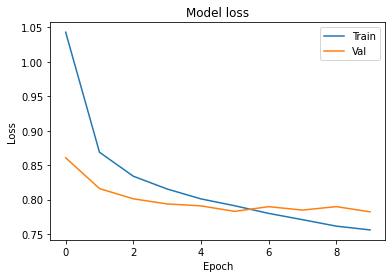

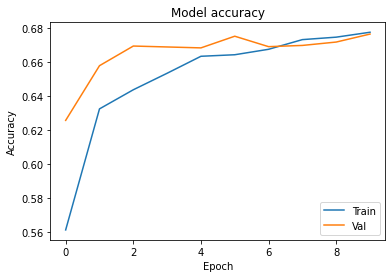

In [25]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

# model 2: CNN

In [35]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

def create_model(padding='same',stride=2,pool=2,filters=64,kernel=5,hidden_layers=2,neurons=20,optimizer='Adadelta',
                 learn_rate=0.001, init_mode='glorot_normal', activation='relu', dropout_rate=0.4,
                 weight_constraint=None,weight_regularizer=None, batchn=0,conv=2, n_filters=2):#parameters here are default

    # initialize the model
    model = Sequential()                                                                       

    for i in range (conv):
        num=int(round(filters*(2**(i-1))))
        for i in range (n_filters):
              model.add(Conv2D(num, kernel, padding=padding,activation=activation,kernel_initializer=init_mode,kernel_constraint=weight_constraint,kernel_regularizer=weight_regularizer))
        model.add(MaxPooling2D(pool_size=(pool, pool), strides=(stride, stride)))
        # model.add(Dropout(dropout_rate))
    # define the first FC => ACTIVATION layers
    model.add(Flatten())
    if (batchn==1):
        model.add(BatchNormalization())     
    model.add(Dropout(dropout_rate)) 
    for i in range(hidden_layers):
        model.add(Dense(neurons,kernel_initializer=init_mode,  activation=activation,kernel_regularizer=weight_regularizer)) 
        if (batchn==1):
            model.add(BatchNormalization())    #, use_bias=False
        model.add(Dropout(dropout_rate)) 
    # lastly, define the soft-max classifier
    model.add(Dense(numClasses, activation='softmax'))

    if (optimizer=='SGD'):
        optimizer = keras.optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
    elif (optimizer=='RMS'):
        optimizer=keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)
    elif (optimizer=='Adagrad'):
        optimizer=keras.optimizers.Adagrad(learning_rate=0.01)
    elif (optimizer=='Adadelta'):
        optimizer=keras.optimizers.Adadelta(learning_rate=1.0, rho=0.95)
    elif (optimizer=='Adamax'):
        optimizer=keras.optimizers.Adamax(learning_rate=0.002, beta_1=0.9, beta_2=0.999)
    elif (optimizer=='Nadam'):
        optimizer=keras.optimizers.Nadam(learning_rate=0.002, beta_1=0.9, beta_2=0.999)
    elif (optimizer=='Adam'):
        optimizer=keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

    model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])              

    return model


In [36]:
shape=x_train.shape
model=create_model()
model.build(shape) 
model.summary()
model=create_model()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (22155, 55, 93, 32)       832       
_________________________________________________________________
conv2d_10 (Conv2D)           (22155, 55, 93, 32)       25632     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (22155, 27, 46, 32)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (22155, 27, 46, 64)       51264     
_________________________________________________________________
conv2d_12 (Conv2D)           (22155, 27, 46, 64)       102464    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (22155, 13, 23, 64)       0         
_________________________________________________________________
flatten_3 (Flatten)          (22155, 19136)           

In [37]:
%%time
history=model.fit(x_train, y_train, epochs=100,batch_size=128, validation_data=(x_test, y_test))

Train on 22155 samples, validate on 5539 samples
Epoch 1/100
22155/22155 [==============================] - 21s 930us/step - loss: 1.2941 - accuracy: 0.5028 - val_loss: 1.0939 - val_accuracy: 0.5754
Epoch 2/100
22155/22155 [==============================] - 20s 913us/step - loss: 1.1046 - accuracy: 0.5738 - val_loss: 1.0463 - val_accuracy: 0.6010
Epoch 3/100
22155/22155 [==============================] - 20s 914us/step - loss: 1.0492 - accuracy: 0.5801 - val_loss: 0.9748 - val_accuracy: 0.5992
Epoch 4/100
22155/22155 [==============================] - 20s 913us/step - loss: 1.0048 - accuracy: 0.5834 - val_loss: 1.0152 - val_accuracy: 0.6023
Epoch 5/100
22155/22155 [==============================] - 20s 916us/step - loss: 0.9690 - accuracy: 0.5901 - val_loss: 0.8827 - val_accuracy: 0.6234
Epoch 6/100
22155/22155 [==============================] - 20s 914us/step - loss: 0.9321 - accuracy: 0.6104 - val_loss: 0.8556 - val_accuracy: 0.6570
Epoch 7/100
22155/22155 [==========================

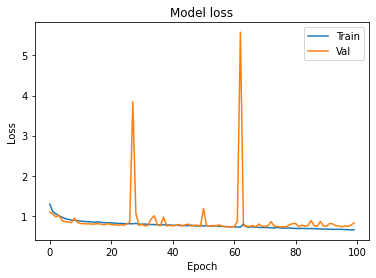

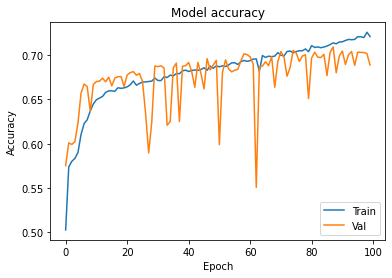

In [38]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [39]:
val_loss, val_acc = model.evaluate(x_test, y_test)
# print(val_loss)
print(val_acc)

from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict_classes(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

5539/5539 [==============================] - 2s 444us/step
0.6887524724006653
[[2420    2    2    0    0    0    0]
 [  30  344  107   15   24   15    0]
 [   2   25  474  173   67   22    0]
 [   2    3  263  249   83   34    0]
 [   0    5   67  101  184   53    0]
 [   0    3   26   28  216  144    0]
 [   0    2   38   40  182   94    0]]
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      2424
         1.0       0.90      0.64      0.75       535
         2.0       0.49      0.62      0.54       763
         3.0       0.41      0.39      0.40       634
         4.0       0.24      0.45      0.32       410
         5.0       0.40      0.35      0.37       417
         6.0       0.00      0.00      0.00       356

    accuracy                           0.69      5539
   macro avg       0.49      0.49      0.48      5539
weighted avg       0.68      0.69      0.68      5539



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#SAVE RESULTS
history = pd.DataFrame(history.history)
history.to_csv('history/history_general_classification.csv', index=False)
# #LOAD RESULTS
# import pandas as pd
# import csv
# history = pd.read_csv('history/history.csv', delimiter=',')

# SAVE THE MODEL
# model.save('model/all_all_2.model')
# #Load it back:
# model = tf.keras.models.load_model('model/all_all_2.model')

# Results

In [40]:
class_names = ['gamma', 'electron', 'proton', 'helium', 'nitrogen',
               'iron', 'silicon']

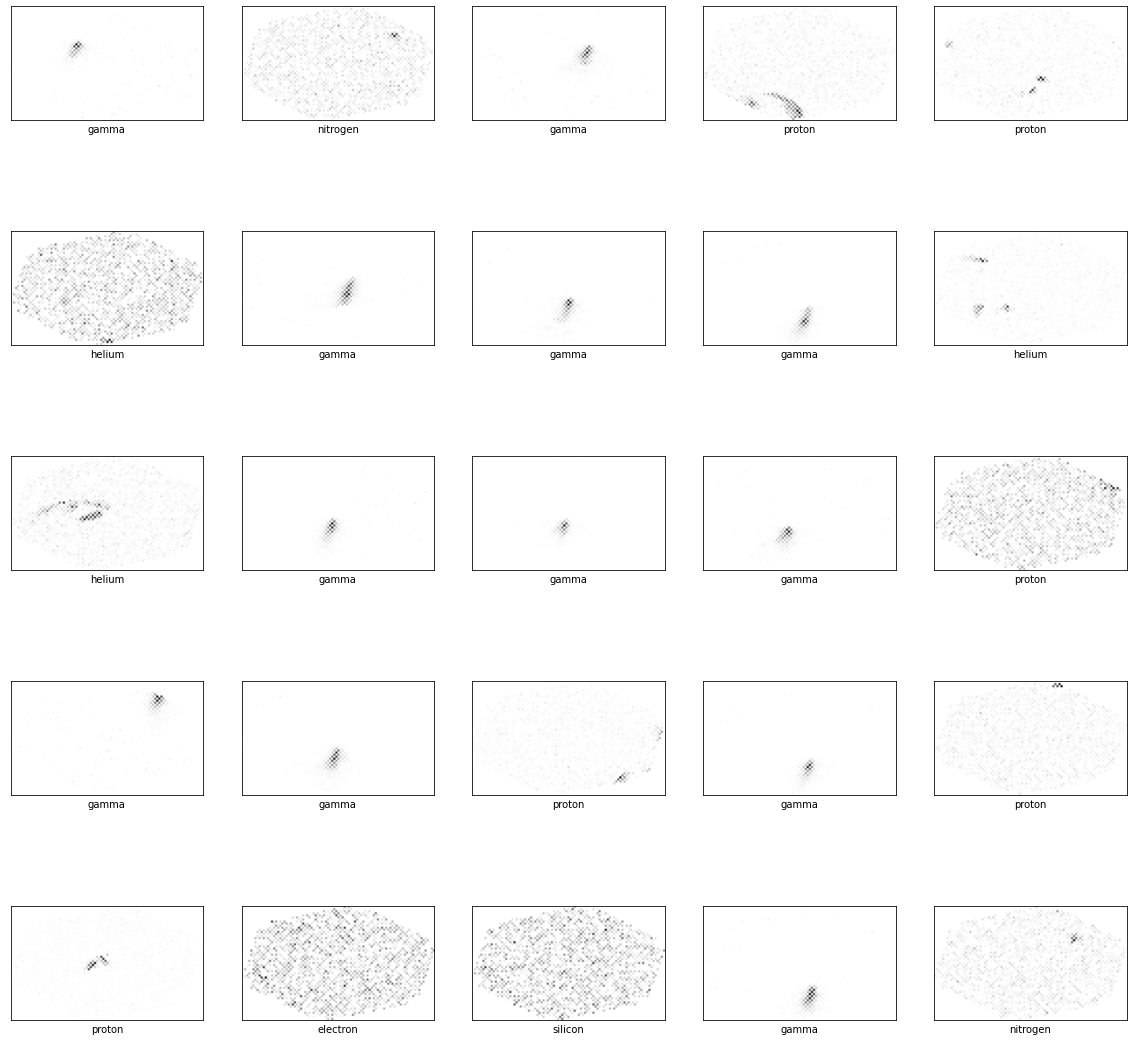

In [41]:
#show images in general

y_train=y_train.astype(int)
y_test=y_test.astype(int)
plt.figure(figsize=(20,20))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [42]:
predictions = model.predict(x_test)
print(predictions[0])
np.argmax(predictions[0])
y_pred = model.predict_classes(x_test)

[1.5789112e-06 7.1991220e-02 5.1254570e-01 4.1531265e-01 1.4882318e-04
 7.4009011e-16 8.6550817e-10]


In [43]:
#define a function to create images that show classification


def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)#, cmap=plt.cm.binary

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(7), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [44]:
#For instance, here I can select wrong classification  for a certain praticle

index=np.where((y_test==6)&(y_pred!=y_test)) [0]
index2=np.where(y_test==2)[0]
# index=np.concatenate([index1,index2])
index=np.sort(index)
incorrect = np.where(y_pred!=y_test)[0]
correct = np.where(y_pred==y_test)[0]
len(index)

356

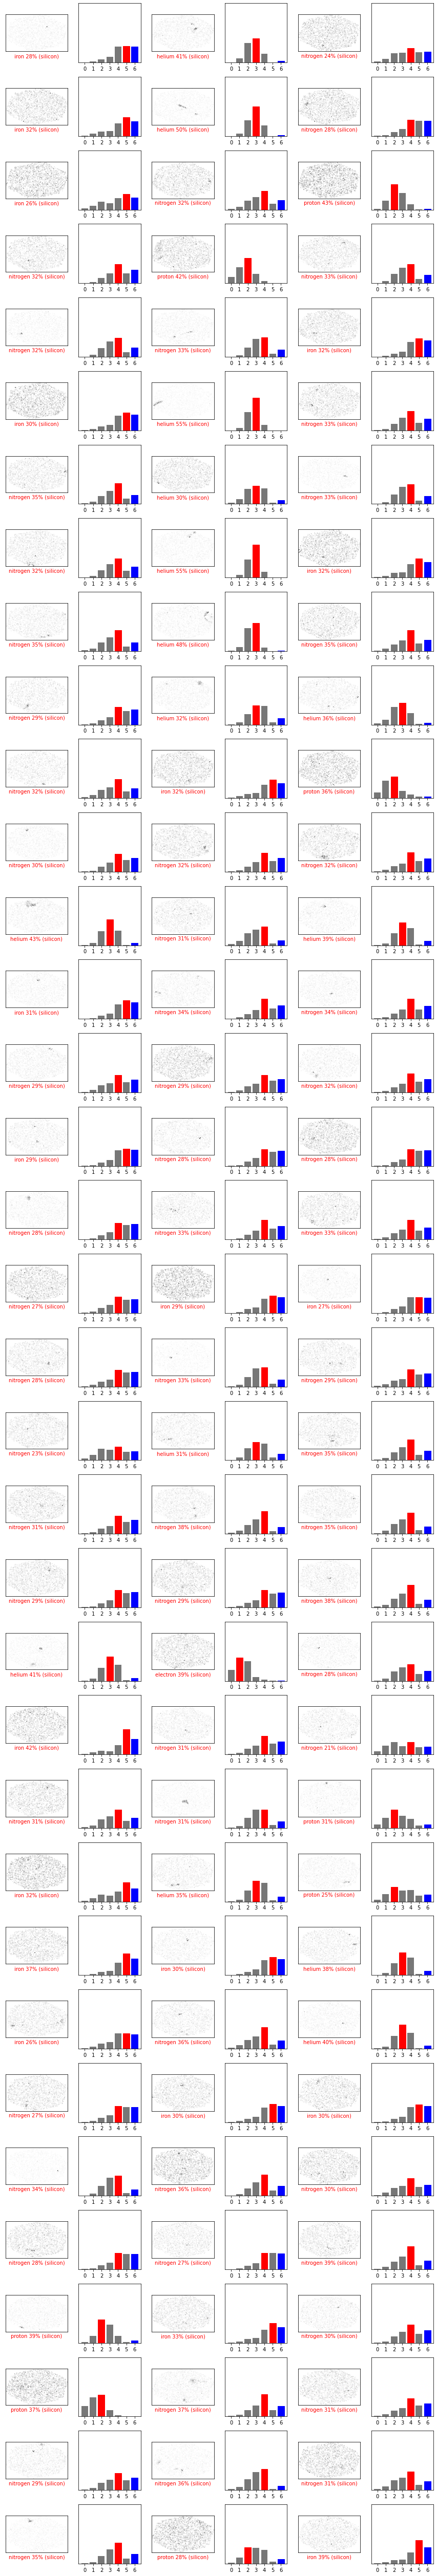

In [45]:
num_rows = 35
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[index][i], y_test[index], X_test[index])
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[index][i],  y_test[index])
plt.tight_layout()
plt.show()

## Grid search

In [ ]:
# PARAMETERS  SI QUIERO CUALQUIER PARAMETRO QUE NO SEA EL DEFAULT LO PONGO AQUI ABAJO

# batch_size = [64]#[128,264]
# epochs = [500]
# optimizer = ['Adam','SGD','Adadelta']#['Nadam','Adagrad','SGD', 'RMSprop', 'Adagrad', 'Adadelta',  'Adamax']
# learn_rate = [0.001,0.0001]#[0.001, 0.01, 0.1, 0.2, 0.3]
# momentum = [0]#[0.0, 0.2, 0.4, 0.6, 0.8, 0.9]  #en este caso momentum es para SGD por ej., para adam solo se usa learn. rate
# activation = ['relu','elu']#['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
# init_mode = ['glorot_normal','lecun_uniform']#['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
dropout_rate =[0.4,0.6] 
# neurons = [15,128,500, 1000] #[5, 10, 15, 20, 25, 30]
# hidden_layers= [1,2]
# padding=['valid', 'same']
stride=[1,2]
pool=[2,4]
# filters=[32,64]
kernel=[3,5]
# weight_regularizer=[regularizers.l2(0.001) , None]
# weight_constraint=[MaxNorm(), None]
# batchn=[0,1]
# n_filters=[1,2]
conv=[1,2]
param_grid = dict(conv=conv,dropout_rate=dropout_rate,kernel=kernel,pool=pool,stride=stride)

In [ ]:
%%time
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
#CREATE THE MODEL FOR GRID SEARCH
model = KerasClassifier(build_fn=create_model, epochs=20, batch_size=64, verbose=2) #if I add any param here has to be also in the model(there has to be a default value)#the values that I set here are definitive
#FIT GRID SEARCH. WITH THE PARAMETERS_GRID, I CAN MODIFY ANY PARAMETER
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=2,verbose=2)

# FIT RANDOM GRID SEARCH
# grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs=-1, cv=2, n_iter=12, verbose=2)

grid_result = grid.fit(x_train, y_train)

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

In [ ]:
#SAVE RESULTS
results = pd.DataFrame(grid_result.cv_results_)
results.to_csv('grid_search/general_classification.csv', index=False)

In [ ]:
#LOAD RESULTS
import csv
results = pd.read_csv('grid_search/general_classification.csv', delimiter=',')


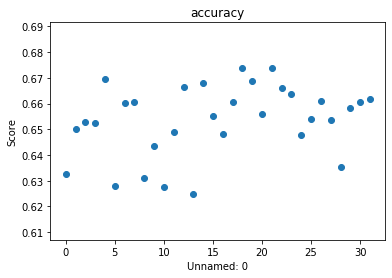

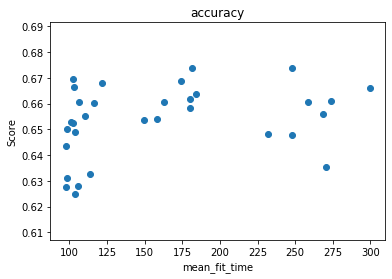

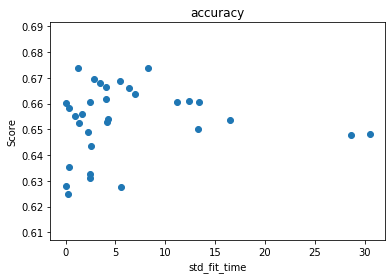

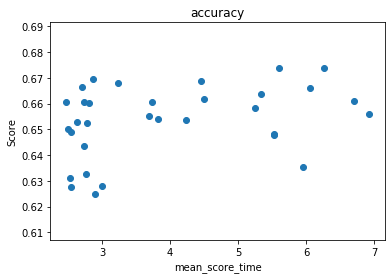

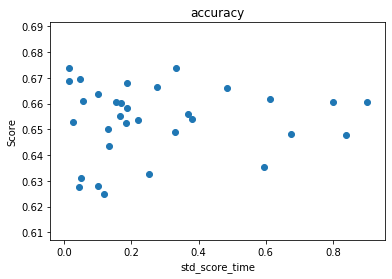

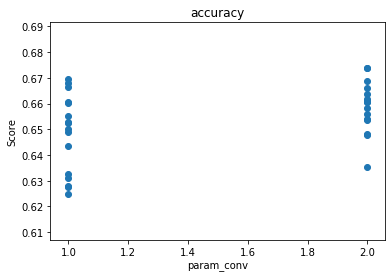

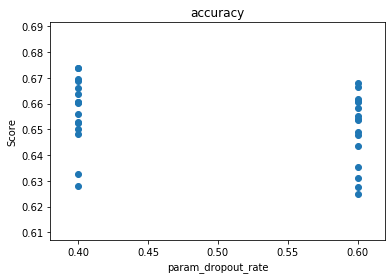

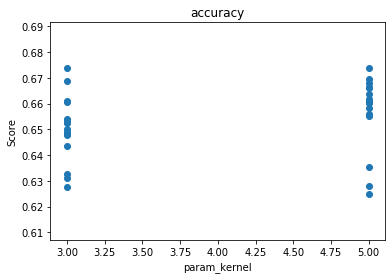

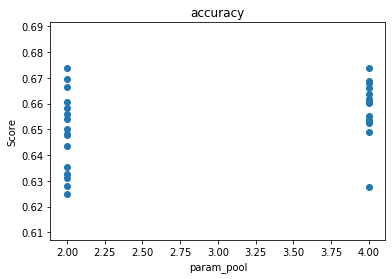

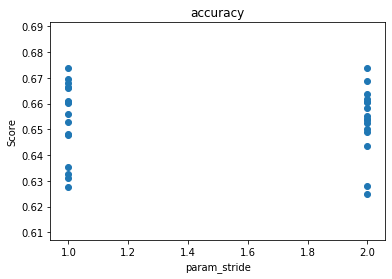

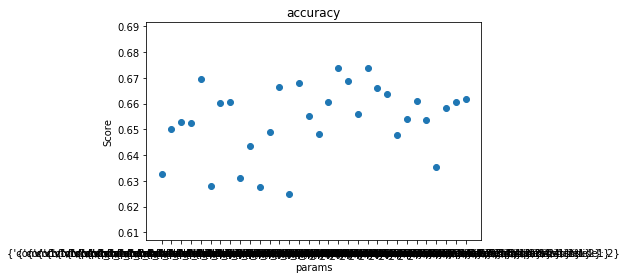

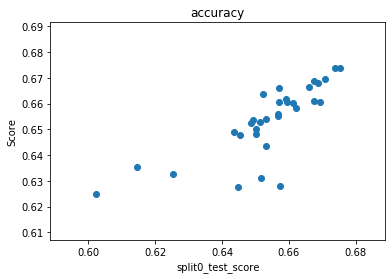

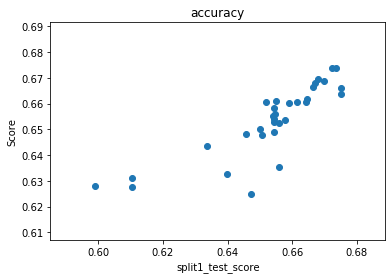

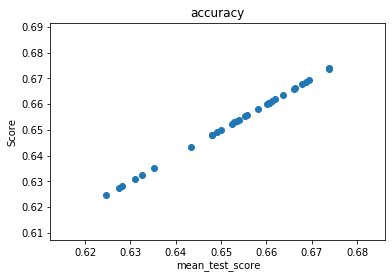

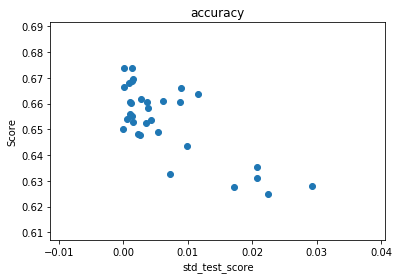

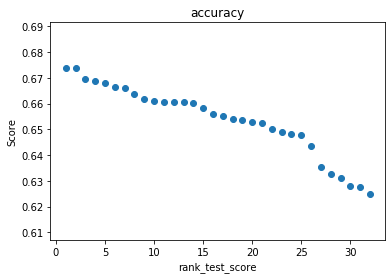

In [ ]:
#PLOTS
#first get the name o the columns
lista=[]
for col in results.columns: 
    lista.append(col)
count=0
for i in results:
    # plot learning curves
    pyplot.title('accuracy')
    pyplot.xlabel(str(lista[count]))
    pyplot.ylabel('Score')
    pyplot.scatter(results[i],results['mean_test_score'] )
    pyplot.show()
    count=count+1

# Grid Search with Tensorboard

In [ ]:
#RECORDAR CAMBIAR DONDE PONE VAL_ACCURACY POR ACCURACY

# Load the TensorBoard notebook extension
%reload_ext tensorboard

In [ ]:
# Clear any logs from previous runs
# !rm -rf ./logs/hparam_tuning2

In [ ]:
import tensorflow as tf
from tensorboard.plugins.hparams import api as hp

In [ ]:
# HP_NUM_UNITS = hp.HParam('num_units', hp.Discrete([16, 32]))
# HP_DROPOUT = hp.HParam('dropout', hp.RealInterval(0.1, 0.2))
# HP_STRIDE = hp.HParam('stride', hp.Discrete([1,2]))
# HP_POOL = hp.HParam('pool', hp.Discrete([4,2]))
# HP_FILTERS = hp.HParam('filters', hp.Discrete([32,64]))
# HP_KERNEL = hp.HParam('kernel', hp.Discrete([3,5,7]))
HP_DROPOUT = hp.HParam('dropout', hp.Discrete([0.1,0.2,0.4,0.6]))
HP_OPTIMIZER = hp.HParam('optimizer', hp.Discrete(['Adam', 'SGD','Adadelta']))
HP_CONV = hp.HParam('conv', hp.Discrete([1,2,4,6]))

METRIC_ACCURACY = 'accuracy'
METRIC_VAL_ACCURACY = 'val_accuracy'



with tf.summary.create_file_writer('logs/hparam_tuning/0').as_default():
      hp.hparams_config(
        hparams=[HP_DROPOUT,HP_OPTIMIZER,HP_CONV],
        metrics=[hp.Metric(METRIC_VAL_ACCURACY, display_name='val_Accuracy')],
      )

In [ ]:
def run(run_dir, hparams):
    with tf.summary.create_file_writer(run_dir).as_default():
        hp.hparams(hparams)  # record the values used in this trial
        val_accuracy = create_model(hparams)
        tf.summary.scalar(METRIC_VAL_ACCURACY,val_accuracy, step=1)

In [ ]:
# model.fit(x_train, y_train, epochs=100,batch_size=128, validation_data=(x_test, y_test),
#         callbacks=[tf.keras.callbacks.TensorBoard(logdir),  # log metrics
#         hp.KerasCallback(logdir, hparams),  # log hparams
#     ],)

In [ ]:
session_num = 0
# for dropout_rate in (HP_DROPOUT.domain.min_value, HP_DROPOUT.domain.max_value):
for dropout in HP_DROPOUT.domain.values:
    for optimizer in HP_OPTIMIZER.domain.values:
        for conv in HP_CONV.domain.values:
          # for filters in HP_FILTERS.domain.values:

            hparams = {
                HP_DROPOUT: dropout,
                HP_OPTIMIZER: optimizer,
                HP_CONV: conv,
                # HP_FILTERS: filters,
            }
            run_name = "run-%d" % session_num
            print('--- Starting trial: %s' % run_name)
            print({h.name: hparams[h] for h in hparams})
            run('logs/hparam_tuning/0/' + run_name, hparams)
            session_num += 1

In [ ]:
%tensorboard --logdir logs/hparam_tuning/0

# model 3. Transfer learning

In [ ]:
import os
import keras
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.applications import Xception
from keras.applications import InceptionResNetV2
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam


In [ ]:
#put x_train with filters rgb (required to use keras applications for transfer learning)
from keras import backend as K

def grayscale_to_rgb(images, channel_axis=-1):
#     images= K.expand_dims(images, axis=channel_axis)
    tiling = [1] * 4    # 4 dimensions: B, H, W, C
    tiling[channel_axis] *= 3
    images= K.tile(images, tiling)
    return images

x_train_3=grayscale_to_rgb(x_train)
x_test_3=grayscale_to_rgb(x_test)

#this is in case I want to resize the images for transfer learning for example.
x_train_n3=tf.image.resize(x_train_3, [96,96], preserve_aspect_ratio=False)
x_test_n3=tf.image.resize(x_test_3, [96,96],preserve_aspect_ratio=False)

#put everything in numpy
x_train_3=x_train_3.numpy()
x_test_3=x_test_3.numpy()
x_train_n3=x_train_n3.numpy()
x_test_n3=x_test_n3.numpy()

In [ ]:
# base_model=keras.applications.xception.Xception(include_top=False, weights='imagenet', input_tensor=None, pooling=None, classes=7)
base_model=keras.applications.inception_resnet_v2.InceptionResNetV2(include_top=False, weights=None, input_tensor=None, input_shape=(96,96,3))

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x = Dropout(0.5)(x)
x=Dense(512,activation='relu')(x) #dense layer 2
x = Dropout(0.5)(x)
preds=Dense(7,activation='softmax')(x) #final layer with softmax activation

In [ ]:
model=Model(inputs=base_model.input,outputs=preds)
model.summary()

In [ ]:
#if imagenet is not selected as weights (in this case not, given that the dataset is not similar), then all the layers have to be trained
for layer in model.layers[:50]:
    layer.trainable=False
for layer in model.layers[50:]:
    layer.trainable=True

In [ ]:
optimizer=keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# history=model.fit(x_train_n3.numpy(), y_train_c, epochs=4,batch_size=128, validation_data=(x_test_n3.numpy(), y_test_c))
history=model.fit(x_train_n3, y_train_c, epochs=8,batch_size=128, validation_data=(x_test_n3, y_test_c))

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()